In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import RidgeClassifier





# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

------
## Reading Data

In [2]:
Trained_Data = pd.read_csv("../input/nslkdd/KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("../input/nslkdd/KDDTest+.txt" , sep = "," , encoding = 'utf-8')

---------
## Exploring Data

In [3]:
Trained_Data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
Tested_Data

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


---------
## Columns Modification

In [5]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [6]:
Trained_Data.columns = Columns
Tested_Data.columns  = Columns

In [7]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


-------
## Data Description

In [9]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [10]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [11]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
Tested_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


-----
## Exploring Responses

In [13]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'warezclient', 'nmap', 'land', 'satan', 'smurf', 'teardrop', 'ipsweep', 'back', 'pod', 'rootkit', 'loadmodule', 'normal', 'guess_passwd', 'phf', 'spy', 'portsweep', 'buffer_overflow', 'imap', 'warezmaster', 'neptune', 'ftp_write', 'perl', 'multihop'} 

## Classifying The Attack Results

In [14]:
# changing attack labels to their respective attack class
def change_label(df):
 df.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
 df.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
 df.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
 df.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)


In [15]:
change_label(Trained_Data)
change_label(Tested_Data)

In [16]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack_state'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack_state'] = attack_LE.fit_transform(Tested_Data["attack"])

In [17]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,4
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,19,0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,4
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,4
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos,21,0
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,21,0
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.0,0.00,Dos,21,0
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,21,0
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.0,0.00,Dos,21,0
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos,21,0


In [18]:
Trained_Data.attack.value_counts()

attack
normal    67342
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

In [19]:
Tested_Data.attack.value_counts()

attack
normal    9711
Dos       7459
R2L       2885
Probe     2421
U2R         67
Name: count, dtype: int64

In [20]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,4
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,19,0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,4
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,4
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos,21,0
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,21,0
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.0,0.00,Dos,21,0
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos,21,0
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.0,0.00,Dos,21,0
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos,21,0


In [21]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.00,1.00,1.00,Dos,21,0
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,4
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.00,0.00,0.00,Probe,15,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.00,0.83,0.71,Probe,11,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,4
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,4
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,0.00,0.00,0.00,0.01,0.01,0.02,0.02,R2L,15,2
7,0,tcp,http,SF,327,467,0,0,0,0,...,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,4
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.08,0.02,0.00,0.00,0.00,0.00,0.00,R2L,7,2
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.66,0.32,Probe,9,1


--------
## Data preprocessing
### Chechking for Missing Data

In [22]:
Trained_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [23]:
Tested_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

-----
- **There is no missing data**

--------
### Checking for Duplicates

In [24]:
Trained_Data.duplicated().sum()

9

In [25]:
Trained_Data.drop_duplicates(subset=None, keep="first", inplace=True)
Trained_Data.duplicated().sum()

0

In [26]:
Tested_Data.duplicated().sum()

3

In [27]:
Tested_Data.drop_duplicates(subset=None, keep="first", inplace=True)
Tested_Data.duplicated().sum()

0

---------
- **There is no duplicated data**

-------------
## Data Encoding

In [28]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [29]:
Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [30]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])

In [31]:
Trained_Data['attack']

0         4
1         0
2         4
3         4
4         0
         ..
125967    0
125968    4
125969    4
125970    0
125971    4
Name: attack, Length: 125963, dtype: int64

----
## Data Splitting 

In [32]:
X_train = Trained_Data.drop('attack', axis = 1)
X_train = Trained_Data.drop('level', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

X_test = Tested_Data.drop('attack', axis = 1)
X_test = Tested_Data.drop('level', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)


Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']

In [33]:
X_train_train,X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

---------
## Data Scaling

In [34]:
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test= Ro_scaler.transform(X_test_test)

In [35]:
X_train_train.shape, Y_train_train.shape

((94472, 124), (94472,))

In [36]:
X_test_train.shape, Y_test_train.shape

((31491, 124), (31491,))

In [37]:
X_train_test.shape, Y_train_test.shape

((16905, 118), (16905,))

In [38]:
X_test_test.shape, Y_test_test.shape

((5635, 118), (5635,))

------
## Working on Trained Data
### VIF 

In [39]:
A = sm.add_constant(X_train.astype(float))
Est1 = sm.GLM(Y_train.astype(float), A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:               125963
Model:                            GLM   Df Residuals:                   125843
Model Family:                Gaussian   Df Model:                          119
Link Function:               Identity   Scale:                      3.2302e-18
Method:                          IRLS   Log-Likelihood:             2.7483e+06
Date:                Mon, 13 May 2024   Deviance:                   8.2526e-16
Time:                        20:31:44   Pearson chi2:                 8.25e-16
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1.667e-11   8.59e-11     -0.194      0.846   -1.85e-10    1.52e-10
duration                     1.901e-16   2.43e-15      0.078      0.938   -4.58e-15    4.96e-15
src_bytes                   -2.116e-18   8.83e-19     -2.396      0.017   -3.85e-18   -3.85e-19
dst_bytes                    4.725e-18   1.26e-18      3.749      0.000    2.25e-18     7.2e-18
land                         1.344e-10   3.66e-10      0.367      0.714   -5.84e-10    8.53e-10
wrong_fragment               9.474e-12   2.47e-11      0.384      0.701   -3.89e-11    5.79e-11
urgent                      -3.056e-11   3.58e-10     -0.085      0.932   -7.32e-10    6.71e-10
hot                          1.224e-11   4.71e-12      2.601      0.009    3.02e-12    2.15e-11
num_failed_logins            2.275e-10   1.16e-10      1.967      0.049    7.57e-13    4.54e-10
logged_in                   -9.303e-12   4.06e-11     -0.229      0.819   -8.88e-11    7.02e-11
num_compromised             -1.142e-11   6.37e-12     -1.792      0.073   -2.39e-11    1.07e-12
root_shell                   -3.13e-10   1.78e-10     -1.760      0.078   -6.62e-10    3.56e-11
su_attempted                 1.355e-10   1.83e-10      0.740      0.459   -2.23e-10    4.94e-10
num_root                     1.147e-11   6.35e-12      1.807      0.071   -9.68e-13    2.39e-11
num_file_creations           2.177e-12   1.09e-11      0.201      0.841   -1.91e-11    2.35e-11
num_shells                  -2.819e-10   2.31e-10     -1.218      0.223   -7.36e-10    1.72e-10
num_access_files             -2.06e-10   7.02e-11     -2.935      0.003   -3.44e-10   -6.84e-11
num_outbound_cmds           -7.638e-17   1.37e-23  -5.59e+06      0.000   -7.64e-17   -7.64e-17
is_host_login                1.563e-11    1.8e-09      0.009      0.993   -3.51e-09    3.54e-09
is_guest_login              -3.487e-10   1.32e-10     -2.641      0.008   -6.07e-10      -9e-11
count                        -8.78e-14   1.07e-13     -0.821      0.412   -2.97e-13    1.22e-13
srv_count                    6.702e-14   1.59e-13      0.421      0.674   -2.45e-13    3.79e-13
serror_rate                 -4.121e-10   1.27e-10     -3.235      0.001   -6.62e-10   -1.62e-10
srv_serror_rate               2.26e-10   1.39e-10      1.625      0.104   -4.65e-11    4.99e-10
rerror_rate                 -3.357e-10   1.36e-10     -2.465      0.014   -6.03e-10   -6.88e-11
srv_rerror_rate              2.371e-10   1.59e-10      1.488      0.137   -7.53e-11    5.49e-10
same_srv_rate               -4.056e-11   4.74e-11     -0.856      0.392   -1.33e-10    5.23e-11
diff_srv_rate               -2.192e-11   4.42e-11     -0.496      0.620   -1.09e-10    6.47e-11
srv_diff_host_rate           1.568e-11   2.54e-11      0.618      0.537   -3.41e-11    6.54e-11
dst_host_co

--------
### Data Modeling

#### Evaluating Function

In [40]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value = Model_Abb.predict(X_test)
    
    Accuracy = metrics.accuracy_score(Y_test, Pred_Value)
    Precision = metrics.precision_score(Y_test, Pred_Value, average='weighted')
    Recall = metrics.recall_score(Y_test, Pred_Value, average='weighted')
    F1_score = metrics.f1_score(Y_test, Pred_Value, average='weighted')
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,2)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,2)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,2)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,2)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix, class_names=['normal','Dos','R2L','Probe','U2R'], figsize=(5.55,5), colorbar= "blue")
    
    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(Y_test))
    y_score = Model_Abb.predict_proba(X_test)
    y_onehot_test = pd.get_dummies(Y_test)
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_onehot_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC AUC
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_onehot_test.values.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

    # Plot ROC curve
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(fpr["micro"], tpr["micro"], label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})", color="deeppink", linestyle=":", linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"], label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})", color="navy", linestyle=":", linewidth=4)
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    class_names = ['Normal','Dos','R2L','Probe','U2R']
    for class_id, color in zip(range(n_classes), colors):
        plt.plot(fpr[class_id], tpr[class_id], color=color, lw=2, label=f"ROC curve for {class_names[class_id]} (AUC = {roc_auc[class_id]:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(Model_Name)
    plt.legend(loc="lower right")
    plt.show()



#### Grid Search Function

In [41]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

## 1. Logistic Regression

In [42]:
LR= LogisticRegression()
LR.fit(X_train_train , Y_train_train)

LogisticRegression()

In [43]:
LR.score(X_train_train, Y_train_train), LR.score(X_test_train, Y_test_train)

(0.8685218900838344, 0.8675812136800991)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.87

The Logistic Regression Model Precision  = 0.87

The Logistic Regression Model Recall     = 0.87

The Logistic Regression Model F1 Score   = 0.87

--------------------------------------------------



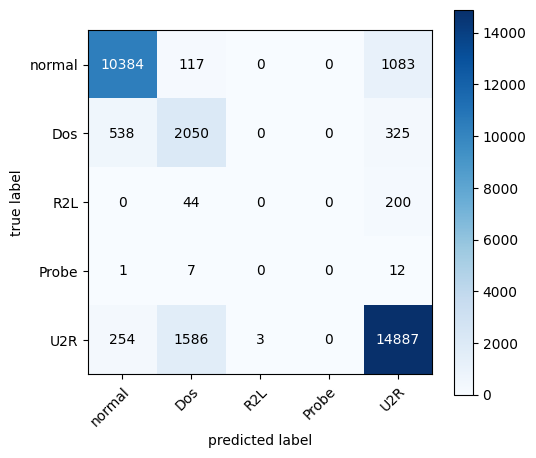

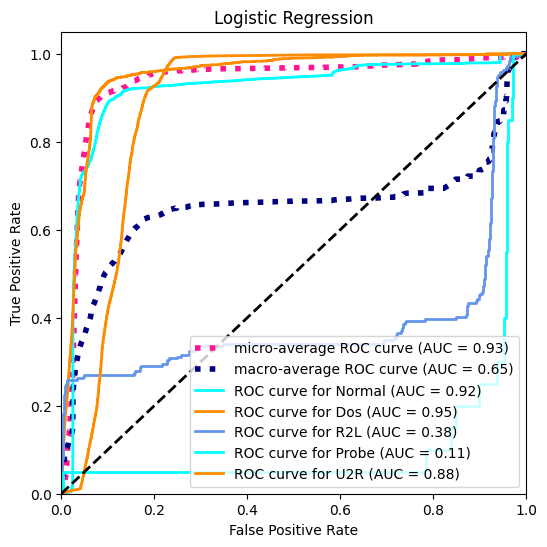

In [44]:
Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)

----------------

## 2. Decision Tree Classifier

In [45]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [46]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.8328922855449233, 0.8332221904671175)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.83

The Decision Tree Classifier Model Precision  = 0.82

The Decision Tree Classifier Model Recall     = 0.83

The Decision Tree Classifier Model F1 Score   = 0.8

--------------------------------------------------



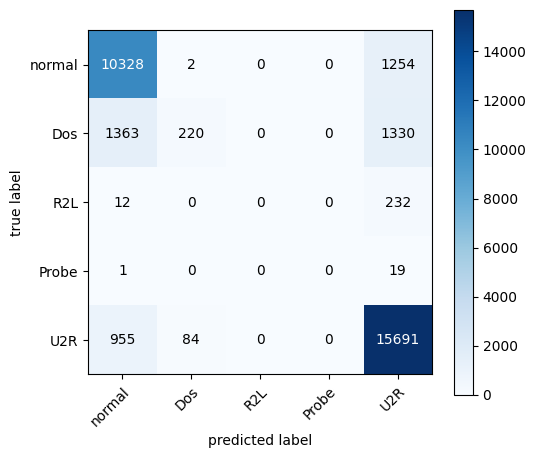

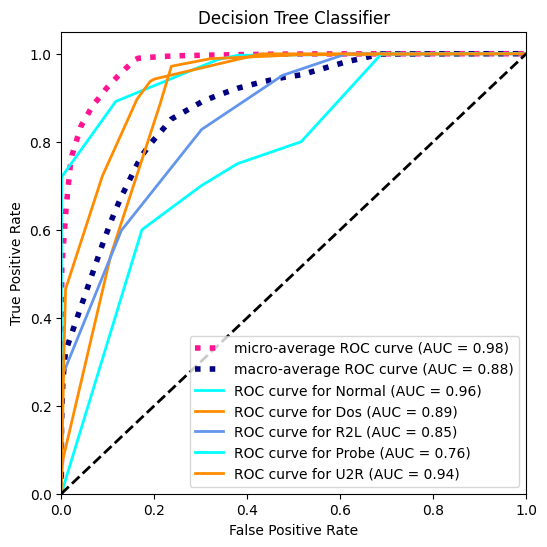

In [47]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

[Text(0.5, 0.9, 'x[33] <= 0.25\ngini = 0.572\nsamples = 94472\nvalue = [34343, 8734, 751, 32, 50612]'),
 Text(0.25, 0.7, 'x[42] <= 0.5\ngini = 0.57\nsamples = 65093\nvalue = [33942, 5427, 361, 26, 25337]'),
 Text(0.125, 0.5, 'x[31] <= 0.214\ngini = 0.527\nsamples = 54367\nvalue = [33280, 4194, 361, 24, 16508]'),
 Text(0.0625, 0.3, 'x[18] <= 0.5\ngini = 0.351\nsamples = 17519\nvalue = [3408, 85, 312, 21, 13693]'),
 Text(0.03125, 0.1, 'gini = 0.339\nsamples = 16988\nvalue = [3408, 85, 90, 21, 13384]'),
 Text(0.09375, 0.1, 'gini = 0.487\nsamples = 531\nvalue = [0, 0, 222, 0, 309]'),
 Text(0.1875, 0.3, 'x[34] <= 0.975\ngini = 0.325\nsamples = 36848\nvalue = [29872, 4109, 49, 3, 2815]'),
 Text(0.15625, 0.1, 'gini = 0.641\nsamples = 12781\nvalue = [5853, 4080, 49, 3, 2796]'),
 Text(0.21875, 0.1, 'gini = 0.004\nsamples = 24067\nvalue = [24019, 29, 0, 0, 19]'),
 Text(0.375, 0.5, 'x[31] <= 0.071\ngini = 0.305\nsamples = 10726\nvalue = [662, 1233, 0, 2, 8829]'),
 Text(0.3125, 0.3, 'x[4] <= 0.5\n

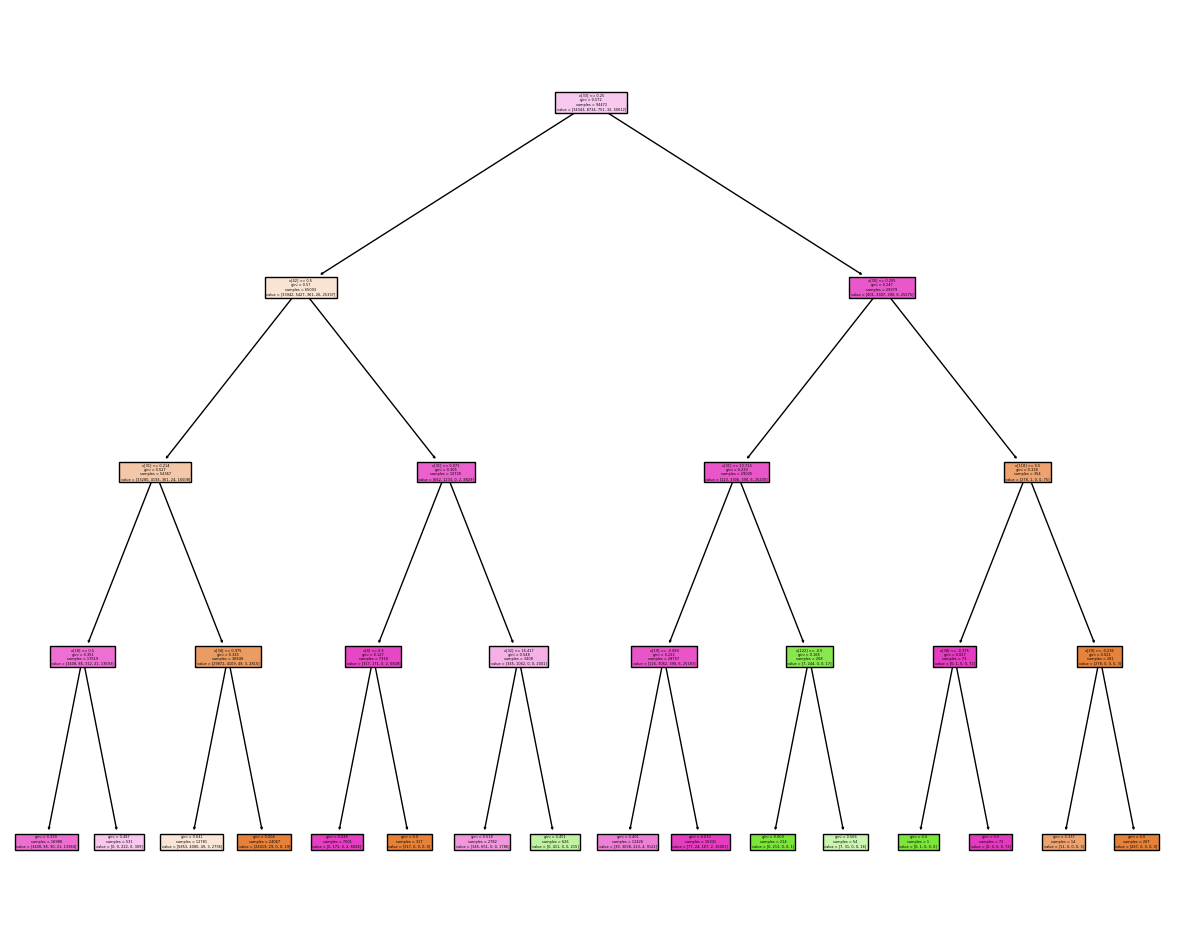

In [48]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

----------------

## 3. Random Forest Classifier

In [49]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={ 'max_depth': max_depth}

In [50]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train_train, Y_train_train)

RandomForestClassifier(max_depth=11)

In [51]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [52]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(1.0, 0.9998729795814677)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model Recall     = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

--------------------------------------------------



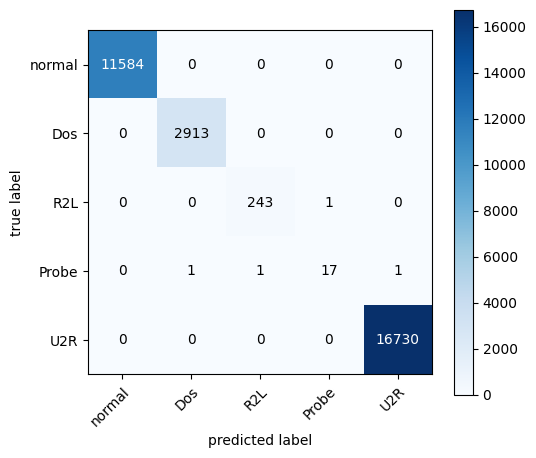

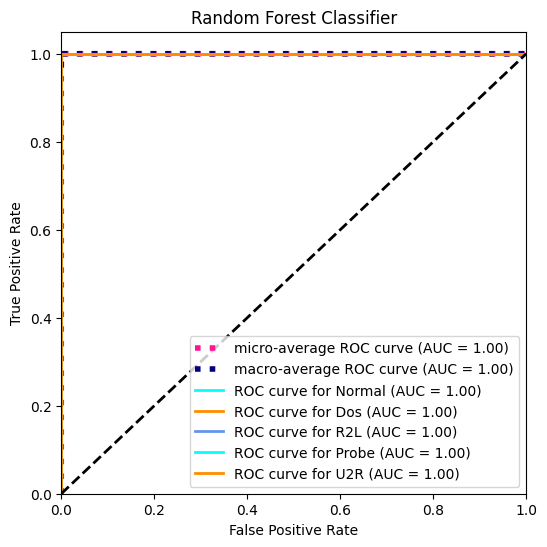

In [53]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

----------------

## 4. KNN-Model

In [54]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train_train, Y_train_train)

KNeighborsClassifier(n_neighbors=6)

In [55]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

(0.9949402997713608, 0.9929821218760916)

--------------------------------------------------

The KNN Model Accuracy   = 0.99

The KNN Model Precision  = 0.99

The KNN Model Recall     = 0.99

The KNN Model F1 Score   = 0.99

--------------------------------------------------



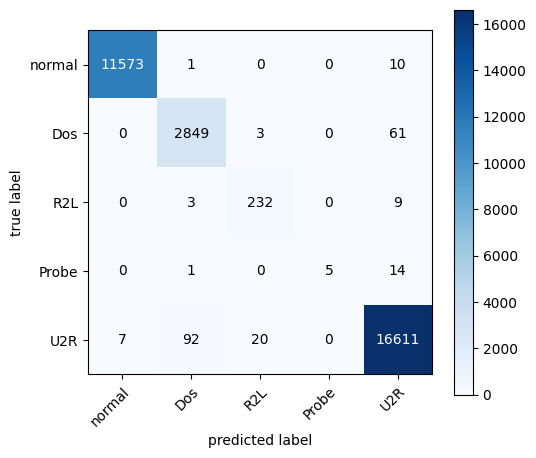

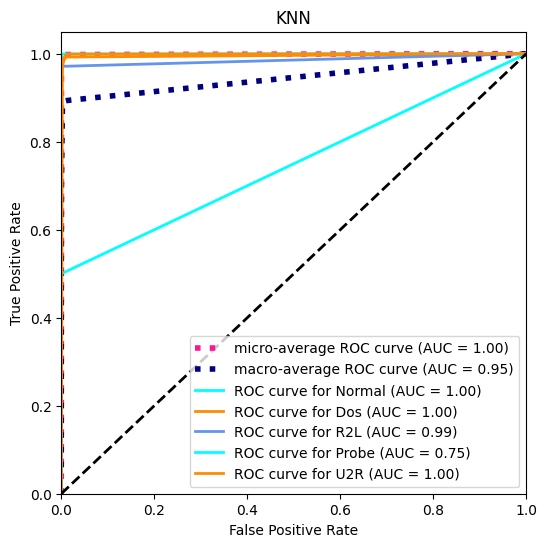

In [56]:
Evaluate('KNN', KNN, X_test_train, Y_test_train)

----------------
## 5. SVM Classifier

### 1st Kernel

In [57]:
# Create LinearSVC classifier without probability estimation
LinearSVC_classifier = LinearSVC()

# Wrap LinearSVC inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_SVC = CalibratedClassifierCV(LinearSVC_classifier, method='sigmoid')

# Fit the classifier
Platt_SVC.fit(X_train_train, Y_train_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [58]:
Platt_SVC.score(X_train_train, Y_train_train), Platt_SVC.score(X_test_train, Y_test_train)

(0.9067025150309086, 0.9068622781112063)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.91

The SVM Linear SVC Kernel Model Precision  = 0.92

The SVM Linear SVC Kernel Model Recall     = 0.91

The SVM Linear SVC Kernel Model F1 Score   = 0.87

--------------------------------------------------



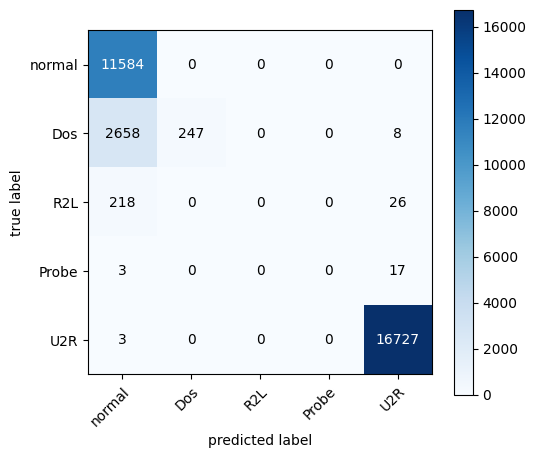

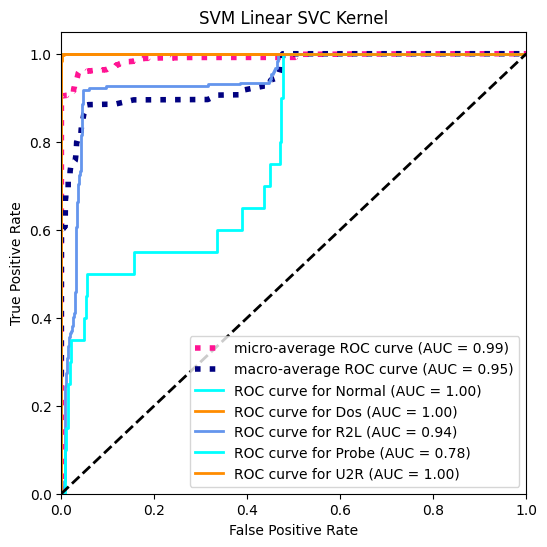

In [59]:
Evaluate('SVM Linear SVC Kernel', Platt_SVC,X_test_train, Y_test_train)

----------------
## 6. Gradient Boosting Classifier

In [60]:
# Instantiate and fit the Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(X_train_train, Y_train_train)


GradientBoostingClassifier()

In [61]:
# Print the training and testing scores
print("Gradient Boosting Classifier Training Score:", GB.score(X_train_train, Y_train_train))
print("Gradient Boosting Classifier Testing Score:", GB.score(X_test_train, Y_test_train))

Gradient Boosting Classifier Training Score: 1.0
Gradient Boosting Classifier Testing Score: 0.9998412244768347


--------------------------------------------------

The Gradient Boosting Classifier Model Accuracy   = 1.0

The Gradient Boosting Classifier Model Precision  = 1.0

The Gradient Boosting Classifier Model Recall     = 1.0

The Gradient Boosting Classifier Model F1 Score   = 1.0

--------------------------------------------------



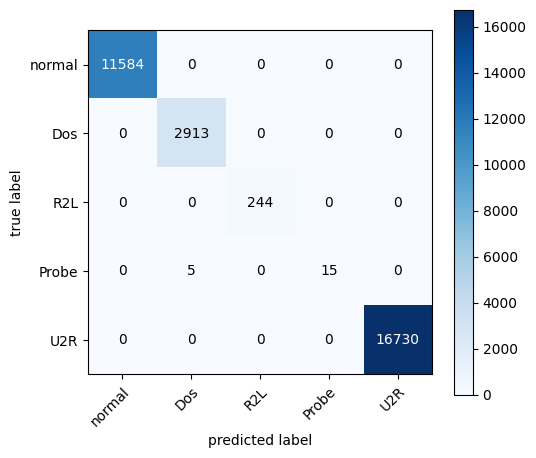

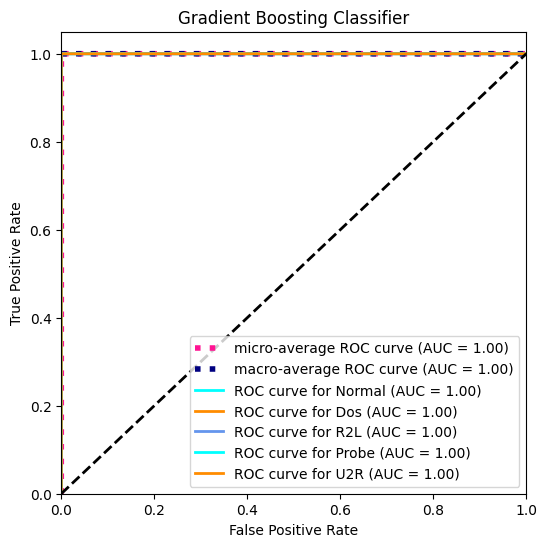

In [62]:
# Evaluate the Gradient Boosting Classifier
Evaluate('Gradient Boosting Classifier', GB, X_test_train, Y_test_train)

----------------

## 7. Extreme Gradient Boosting (XGBoost) Classifier

In [63]:
# Instantiate and fit the XGBoost Classifier
XGB = xgb.XGBClassifier(n_estimators=100, random_state=42)
XGB.fit(X_train_train, Y_train_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [64]:
# Print the training and testing scores
print("XGBoost Classifier Training Score:", XGB.score(X_train_train, Y_train_train))
print("XGBoost Classifier Testing Score:", XGB.score(X_test_train, Y_test_train))

XGBoost Classifier Training Score: 1.0
XGBoost Classifier Testing Score: 1.0


--------------------------------------------------

The XGBoost Classifier Model Accuracy   = 1.0

The XGBoost Classifier Model Precision  = 1.0

The XGBoost Classifier Model Recall     = 1.0

The XGBoost Classifier Model F1 Score   = 1.0

--------------------------------------------------



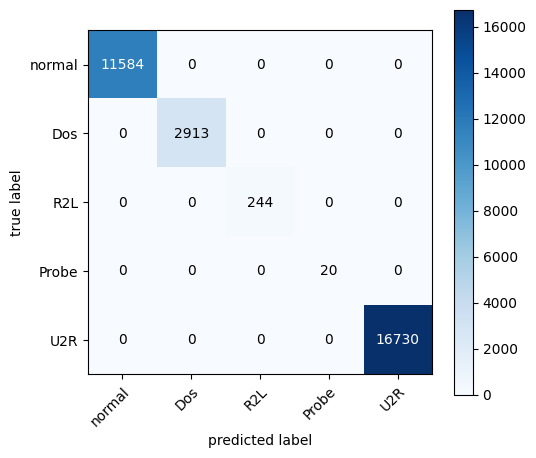

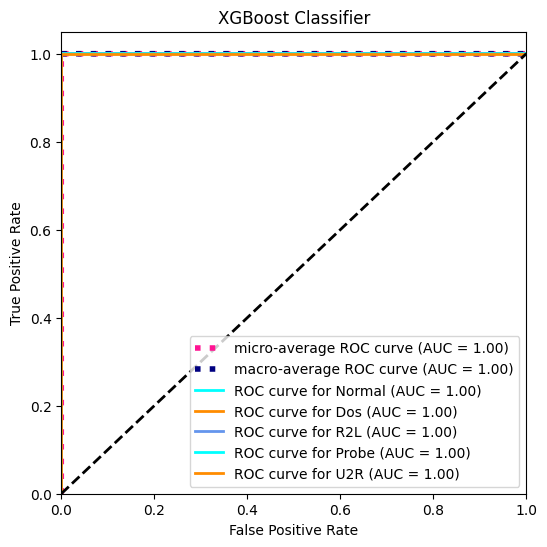

In [65]:
# Evaluate the XGBoost Classifier
Evaluate('XGBoost Classifier', XGB, X_test_train, Y_test_train)

----------------

## 8. Light Gradient Boosting Machine (LGBM) Classifier

In [66]:
# Instantiate and fit the LGBM Classifier
LGBM = lgb.LGBMClassifier()
LGBM.fit(X_train_train, Y_train_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3327
[LightGBM] [Info] Number of data points in the train set: 94472, number of used features: 112
[LightGBM] [Info] Start training from score -1.011905
[LightGBM] [Info] Start training from score -2.381080
[LightGBM] [Info] Start training from score -4.834653
[LightGBM] [Info] Start training from score -7.990323
[LightGBM] [Info] Start training from score -0.624115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier()

In [67]:
# Print the training and testing scores
print("LGBM Classifier Training Score:", LGBM.score(X_train_train, Y_train_train))
print("LGBM Classifier Testing Score:", LGBM.score(X_test_train, Y_test_train))

LGBM Classifier Training Score: 0.971610635955627
LGBM Classifier Testing Score: 0.9715156711441364


--------------------------------------------------

The LGBM Classifier Model Accuracy   = 0.97

The LGBM Classifier Model Precision  = 0.97

The LGBM Classifier Model Recall     = 0.97

The LGBM Classifier Model F1 Score   = 0.97

--------------------------------------------------



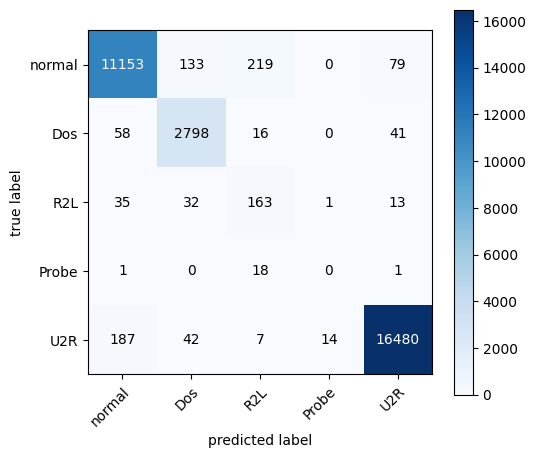

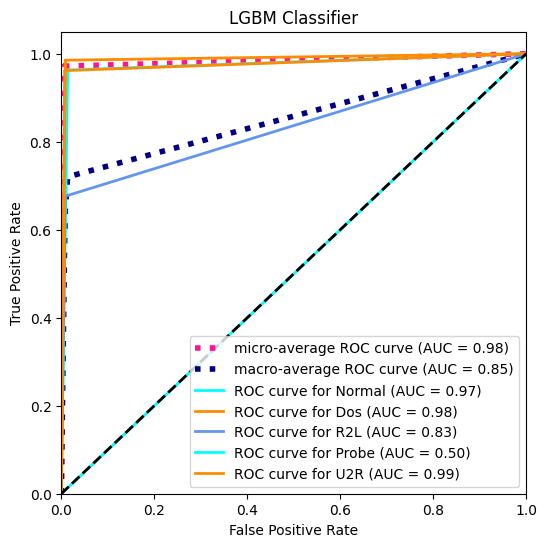

In [68]:
# Evaluate the LGBM Classifier
Evaluate('LGBM Classifier', LGBM, X_test_train, Y_test_train)

----------------

## 9. CatBoost Classifier

In [69]:
# Instantiate and fit the CatBoost Classifier
CatBoost = CatBoostClassifier(learning_rate=0.1,depth=6,n_estimators=100,l2_leaf_reg=3,random_state=42)
CatBoost.fit(X_train_train, Y_train_train)

0:	learn: 1.2327535	total: 148ms	remaining: 14.6s
1:	learn: 1.0030130	total: 217ms	remaining: 10.6s
2:	learn: 0.8402456	total: 296ms	remaining: 9.57s
3:	learn: 0.7160126	total: 361ms	remaining: 8.66s
4:	learn: 0.6169513	total: 435ms	remaining: 8.27s
5:	learn: 0.5360977	total: 508ms	remaining: 7.96s
6:	learn: 0.4689003	total: 581ms	remaining: 7.71s
7:	learn: 0.4122002	total: 650ms	remaining: 7.47s
8:	learn: 0.3636956	total: 729ms	remaining: 7.37s
9:	learn: 0.3222869	total: 801ms	remaining: 7.2s
10:	learn: 0.2861390	total: 881ms	remaining: 7.13s
11:	learn: 0.2547386	total: 957ms	remaining: 7.02s
12:	learn: 0.2272971	total: 1.03s	remaining: 6.87s
13:	learn: 0.2032578	total: 1.09s	remaining: 6.71s
14:	learn: 0.1818616	total: 1.18s	remaining: 6.69s
15:	learn: 0.1630264	total: 1.26s	remaining: 6.61s
16:	learn: 0.1462372	total: 1.32s	remaining: 6.45s
17:	learn: 0.1312873	total: 1.4s	remaining: 6.38s
18:	learn: 0.1180131	total: 1.48s	remaining: 6.32s
19:	learn: 0.1061130	total: 1.56s	remaining

In [70]:
# Print the training and testing scores
print("CatBoost Classifier Training Score:", CatBoost.score(X_train_train, Y_train_train))
print("CatBoost Classifier Testing Score:", CatBoost.score(X_test_train, Y_test_train))


CatBoost Classifier Training Score: 1.0
CatBoost Classifier Testing Score: 1.0


--------------------------------------------------

The CatBoost Classifier Model Accuracy   = 1.0

The CatBoost Classifier Model Precision  = 1.0

The CatBoost Classifier Model Recall     = 1.0

The CatBoost Classifier Model F1 Score   = 1.0

--------------------------------------------------



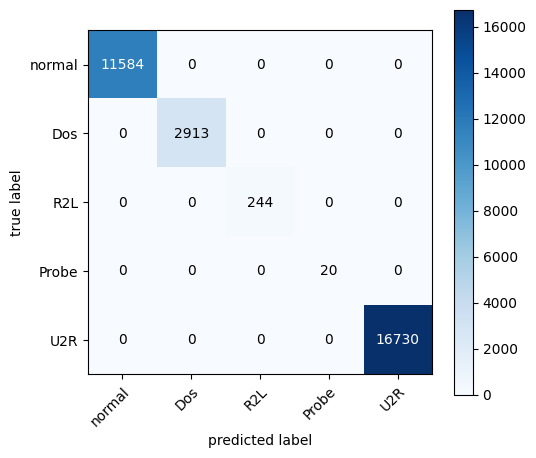

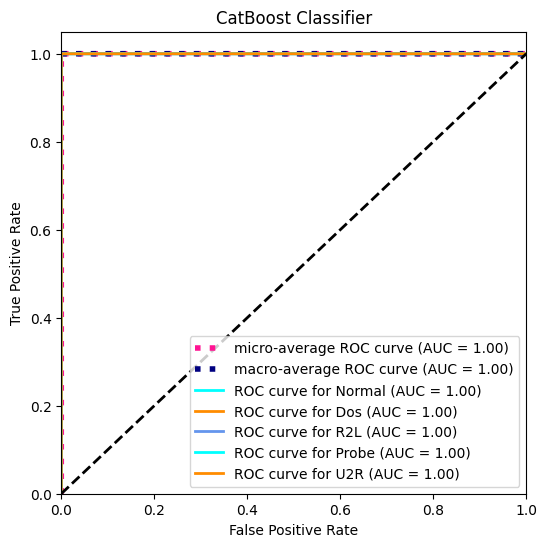

In [71]:
# Evaluate the CatBoost Classifier
Evaluate('CatBoost Classifier', CatBoost, X_test_train, Y_test_train)

----------------

## 10. Naive Bayes Classifier

In [72]:
# Instantiate and fit the Naive Bayes Classifier
NB = GaussianNB(var_smoothing=1e-9)
NB.fit(X_train_train, Y_train_train)

GaussianNB()

In [73]:
# Print the training and testing scores
print("Naive Bayes Classifier Training Score:", NB.score(X_train_train, Y_train_train))
print("Naive Bayes Classifier Testing Score:", NB.score(X_test_train, Y_test_train))


Naive Bayes Classifier Training Score: 0.5128397832161911
Naive Bayes Classifier Testing Score: 0.5131307357657744


--------------------------------------------------

The Naive Bayes Classifier Model Accuracy   = 0.51

The Naive Bayes Classifier Model Precision  = 0.76

The Naive Bayes Classifier Model Recall     = 0.51

The Naive Bayes Classifier Model F1 Score   = 0.46

--------------------------------------------------



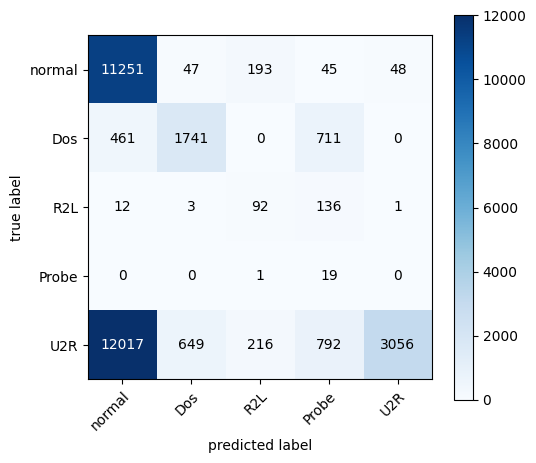

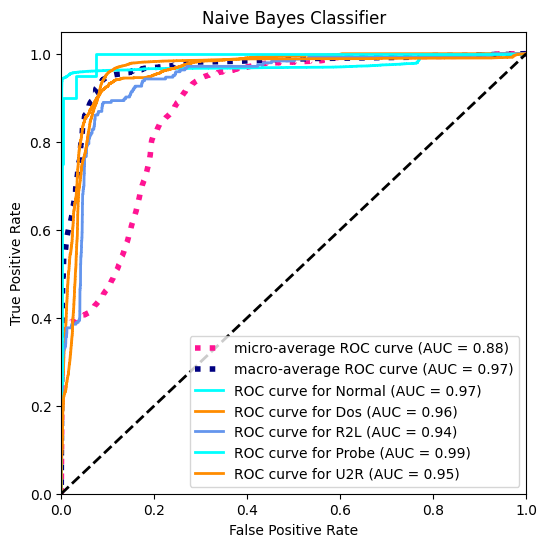

In [74]:
# Evaluate the Naive Bayes Classifier
Evaluate('Naive Bayes Classifier', NB, X_test_train, Y_test_train)

----------------

## 11. Linear Discriminant Analysis (LDA)

In [75]:
# Instantiate the LDA model 
LDA = LinearDiscriminantAnalysis(solver='lsqr')  
LDA.fit(X_train_train, Y_train_train)

LinearDiscriminantAnalysis(solver='lsqr')

In [76]:
# Print the training and testing scores
print("Linear Discriminant Analysis Training Score:", LDA.score(X_train_train, Y_train_train))
print("Linear Discriminant Analysis Testing Score:", LDA.score(X_test_train, Y_test_train))

Linear Discriminant Analysis Training Score: 0.97444745533068
Linear Discriminant Analysis Testing Score: 0.9734209774221206


--------------------------------------------------

The Linear Discriminant Analysis Model Accuracy   = 0.97

The Linear Discriminant Analysis Model Precision  = 0.98

The Linear Discriminant Analysis Model Recall     = 0.97

The Linear Discriminant Analysis Model F1 Score   = 0.98

--------------------------------------------------



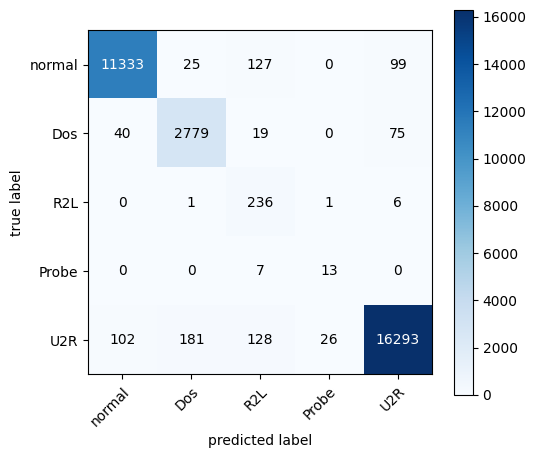

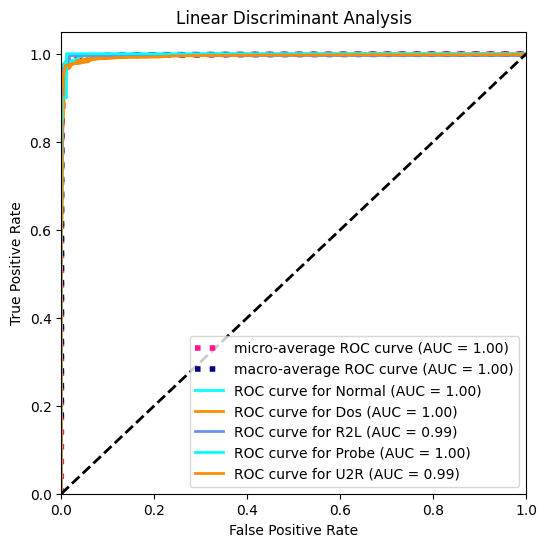

In [77]:
# Evaluate the LDA model
Evaluate('Linear Discriminant Analysis', LDA, X_test_train, Y_test_train)


----------------

## 12. Quadratic Discriminant Analysis (QDA)

In [78]:
# Instantiate the QDA model 
QDA = QuadraticDiscriminantAnalysis(reg_param=0.1) 
QDA.fit(X_train_train, Y_train_train)

QuadraticDiscriminantAnalysis(reg_param=0.1)

In [79]:
# Print the training and testing scores
print("Quadratic Discriminant Analysis Training Score:", QDA.score(X_train_train, Y_train_train))
print("Quadratic Discriminant Analysis Testing Score:", QDA.score(X_test_train, Y_test_train))


Quadratic Discriminant Analysis Training Score: 0.9376958252180541
Quadratic Discriminant Analysis Testing Score: 0.9350925661300054


--------------------------------------------------

The Quadratic Discriminant Analysis Model Accuracy   = 0.94

The Quadratic Discriminant Analysis Model Precision  = 0.94

The Quadratic Discriminant Analysis Model Recall     = 0.94

The Quadratic Discriminant Analysis Model F1 Score   = 0.94

--------------------------------------------------



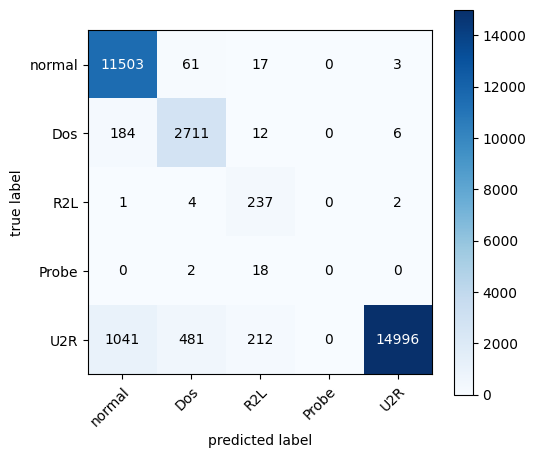

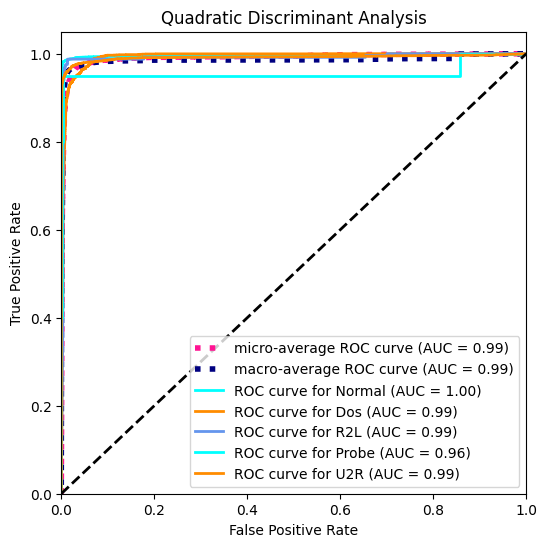

In [80]:
# Evaluate the QDA model 
Evaluate('Quadratic Discriminant Analysis', QDA, X_test_train, Y_test_train)

----------------

## 13. Passive Aggressive Classifier

In [81]:
# Create PassiveAggressiveClassifier
PAC_classifier = PassiveAggressiveClassifier(C=0.1, max_iter=1000)

# Wrap PassiveAggressiveClassifier inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_PAC = CalibratedClassifierCV(PAC_classifier, method='sigmoid')

# Fit the classifier
Platt_PAC.fit(X_train_train, Y_train_train)

CalibratedClassifierCV(estimator=PassiveAggressiveClassifier(C=0.1))

In [82]:
# Print the training and testing scores
print("Passive Aggressive Classifier Training Score:", Platt_PAC.score(X_train_train, Y_train_train))
print("Passive Aggressive Classifier Testing Score:", Platt_PAC.score(X_test_train, Y_test_train))


Passive Aggressive Classifier Training Score: 0.5357248708612076
Passive Aggressive Classifier Testing Score: 0.5312629005112571


--------------------------------------------------

The Passive Aggressive Classifier Model Accuracy   = 0.53

The Passive Aggressive Classifier Model Precision  = 0.28

The Passive Aggressive Classifier Model Recall     = 0.53

The Passive Aggressive Classifier Model F1 Score   = 0.37

--------------------------------------------------



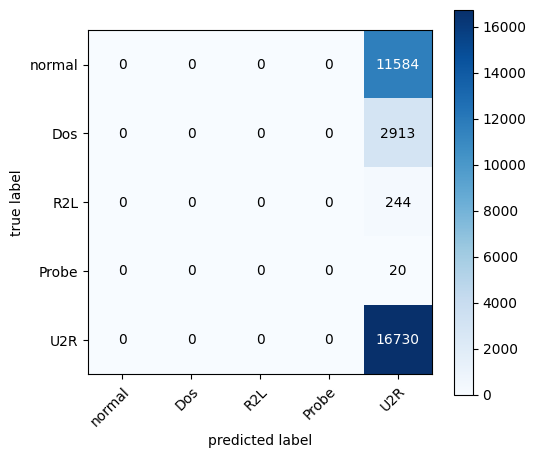

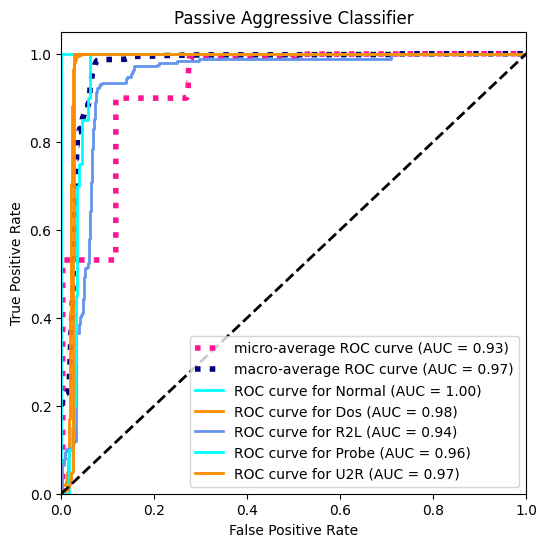

In [83]:
# Evaluate the Passive Aggressive Classifier
Evaluate('Passive Aggressive Classifier', Platt_PAC, X_test_train, Y_test_train)

----------------

## 14. AdaBoost Classifier

In [84]:
# Instantiate the base estimator (DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_features=6, max_depth=4)  

# Instantiate the AdaBoost Classifier with adjusted parameters
AdaBoost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=1.0)  
AdaBoost.fit(X_train_train, Y_train_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         max_features=6),
                   n_estimators=100)

In [85]:
# Print the training and testing scores
print("AdaBoost Classifier Training Score:", AdaBoost.score(X_train_train, Y_train_train))
print("AdaBoost Classifier Testing Score:", AdaBoost.score(X_test_train, Y_test_train))

AdaBoost Classifier Training Score: 0.9999788297061564
AdaBoost Classifier Testing Score: 0.9998412244768347


--------------------------------------------------

The AdaBoost Classifier Model Accuracy   = 1.0

The AdaBoost Classifier Model Precision  = 1.0

The AdaBoost Classifier Model Recall     = 1.0

The AdaBoost Classifier Model F1 Score   = 1.0

--------------------------------------------------



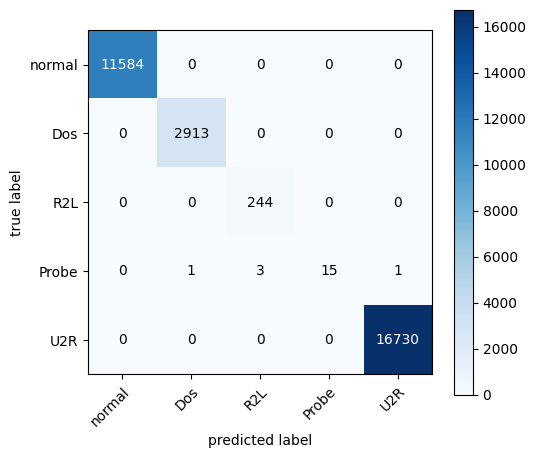

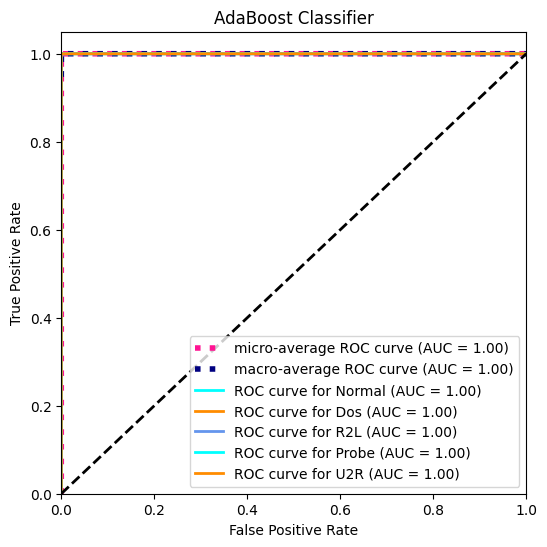

In [86]:
# Evaluate the AdaBoost Classifier
Evaluate('AdaBoost Classifier', AdaBoost, X_test_train, Y_test_train)

----------------

## 15. Ridge Classifier

In [87]:
# Create RidgeClassifier
ridge_classifier = RidgeClassifier(alpha=1.0)

# Wrap RidgeClassifier inside CalibratedClassifierCV with method='sigmoid' for Platt scaling
Platt_ridge = CalibratedClassifierCV(ridge_classifier, method='sigmoid')

# Fit the classifier
Platt_ridge.fit(X_train_train, Y_train_train)


CalibratedClassifierCV(estimator=RidgeClassifier())

In [88]:
# Print the training and testing scores
print("Ridge Classifier Training Score:", Platt_ridge.score(X_train_train, Y_train_train))
print("Ridge Classifier Testing Score:", Platt_ridge.score(X_test_train, Y_test_train))

Ridge Classifier Training Score: 0.995585993733593
Ridge Classifier Testing Score: 0.9950462036772412


--------------------------------------------------

The Ridge Classifier Model Accuracy   = 1.0

The Ridge Classifier Model Precision  = 1.0

The Ridge Classifier Model Recall     = 1.0

The Ridge Classifier Model F1 Score   = 0.99

--------------------------------------------------



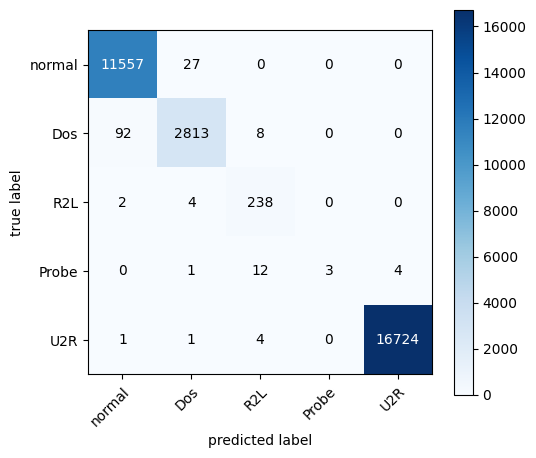

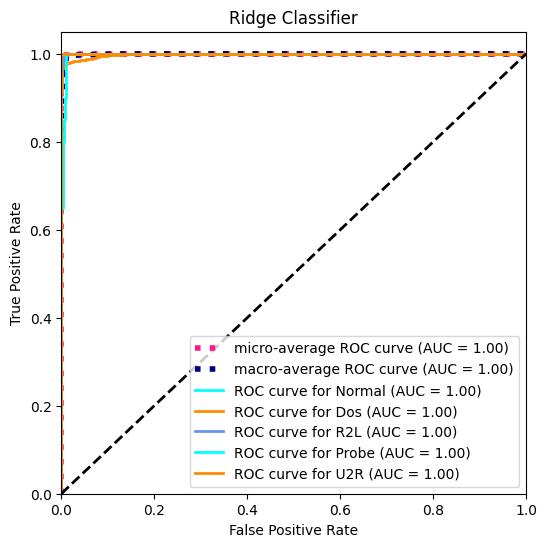

In [89]:
# Evaluate the Ridge Classifier
Evaluate('Ridge Classifier', Platt_ridge, X_test_train, Y_test_train)